In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df['Taxable.Income'] = np.where( df['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [8]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [10]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [11]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])

In [12]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Taxable.Income           600 non-null    object
 1   City.Population          600 non-null    int64 
 2   Work.Experience          600 non-null    int64 
 3   Undergrad_NO             600 non-null    uint8 
 4   Undergrad_YES            600 non-null    uint8 
 5   Marital.Status_Divorced  600 non-null    uint8 
 6   Marital.Status_Married   600 non-null    uint8 
 7   Marital.Status_Single    600 non-null    uint8 
 8   Urban_NO                 600 non-null    uint8 
 9   Urban_YES                600 non-null    uint8 
dtypes: int64(2), object(1), uint8(7)
memory usage: 18.3+ KB


In [14]:
dtree=DecisionTreeClassifier(criterion="gini",max_depth=1,splitter='best')

In [15]:
df.dtypes

Taxable.Income             object
City.Population             int64
Work.Experience             int64
Undergrad_NO                uint8
Undergrad_YES               uint8
Marital.Status_Divorced     uint8
Marital.Status_Married      uint8
Marital.Status_Single       uint8
Urban_NO                    uint8
Urban_YES                   uint8
dtype: object

In [16]:
features=df.drop('Taxable.Income',axis=1)

In [17]:
target=df[['Taxable.Income']]

In [18]:
features


,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [19]:
target

,Taxable.Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [20]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [21]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [22]:
y_test

,Taxable.Income
360,Good
239,Good
365,Good
306,Good
575,Risky
...,...
505,Good
189,Good
333,Risky
563,Good


In [23]:
y_predt=dtree.predict(x_test)

In [24]:
y_predt

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [25]:
accuracy_score(y_test,y_predt)

0.8066666666666666

In [26]:
conf=confusion_matrix(y_test,y_predt)

In [27]:
conf

array([[121,   0],
       [ 29,   0]], dtype=int64)

<Axes: >

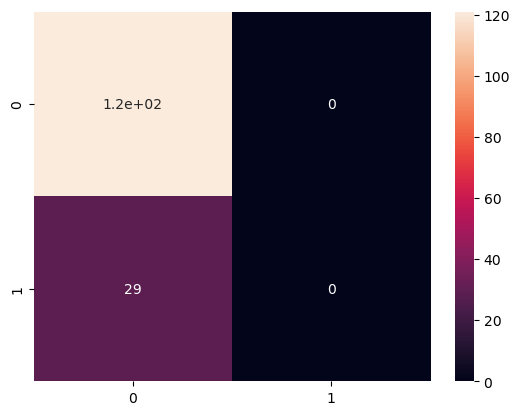

In [28]:
sns.heatmap(conf,annot=True)

In [29]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [30]:
grid=GridSearchCV(dtree,params)

In [31]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [32]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

[Text(0.5, 0.75, 'x[0] <= 63521.0\ngini = 0.333\nsamples = 450\nvalue = [355, 95]'),
 Text(0.25, 0.25, 'gini = 0.213\nsamples = 107\nvalue = [94, 13]'),
 Text(0.75, 0.25, 'gini = 0.364\nsamples = 343\nvalue = [261, 82]')]

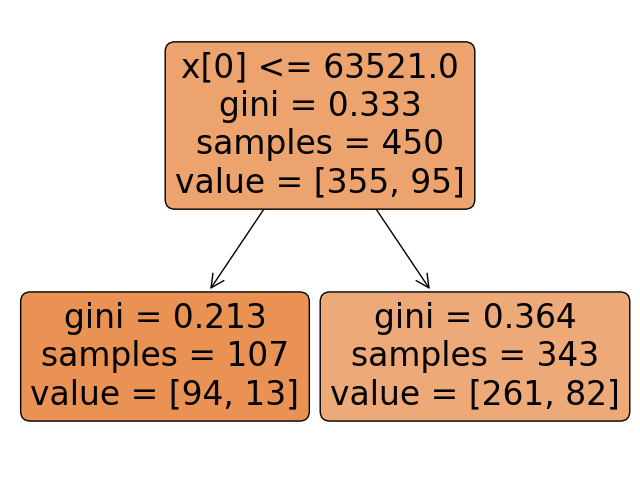

In [33]:
plt.figure(figsize=(8,6))
plot_tree(dtree,filled=True,max_depth=2,rounded=True,feature_names=df.get(features))